The idea was taken from
 Kaggle (https://www.kaggle.com/datasets/crawford/80-cereals) and proposed as an exercise in the AI ​​and Big Data Specialization Course of the IES Abastos for the Automatic Learning Systems subject.


# Cereal rating
If you like to eat cereal, do yourself a favor and avoid this dataset at all costs. After seeing these data it will never be the same for me to eat Fruity Pebbles again.

## Acknowledgements
These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. The original source can be found here (https://perso.telecom-paristech.fr/eagan/class/igr204/datasets)

This dataset has been converted to CSV

# Development

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('cereal.csv')

In [45]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [47]:
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [48]:
nombre = df['name']

## Data preparation

### Attribute mfr

In [49]:
one_hot = pd.get_dummies(df.mfr, prefix='mfr')
one_hot.head()

,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


In [50]:
df = df.drop('mfr', axis=1)
df = df.join(one_hot)
df.head()

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,weight,cups,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,100% Bran,C,70,4,1,130,10.0,5.0,6,280,...,1.0,0.33,68.402973,0,0,0,1,0,0,0
1,100% Natural Bran,C,120,3,5,15,2.0,8.0,8,135,...,1.0,1.00,33.983679,0,0,0,0,0,1,0
2,All-Bran,C,70,4,1,260,9.0,7.0,5,320,...,1.0,0.33,59.425505,0,0,1,0,0,0,0
3,All-Bran with Extra Fiber,C,50,4,0,140,14.0,8.0,0,330,...,1.0,0.50,93.704912,0,0,1,0,0,0,0
4,Almond Delight,C,110,2,2,200,1.0,14.0,8,-1,...,1.0,0.75,34.384843,0,0,0,0,0,0,1


### Attribute type

In [51]:
df['type'].value_counts()

C    74
H     3
Name: type, dtype: int64

In [52]:
df['type'] = df['type'].map({'C': 0, 'H': 1})

In [53]:
df.head()

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,weight,cups,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,100% Bran,0,70,4,1,130,10.0,5.0,6,280,...,1.0,0.33,68.402973,0,0,0,1,0,0,0
1,100% Natural Bran,0,120,3,5,15,2.0,8.0,8,135,...,1.0,1.00,33.983679,0,0,0,0,0,1,0
2,All-Bran,0,70,4,1,260,9.0,7.0,5,320,...,1.0,0.33,59.425505,0,0,1,0,0,0,0
3,All-Bran with Extra Fiber,0,50,4,0,140,14.0,8.0,0,330,...,1.0,0.50,93.704912,0,0,1,0,0,0,0
4,Almond Delight,0,110,2,2,200,1.0,14.0,8,-1,...,1.0,0.75,34.384843,0,0,0,0,0,0,1


## Model

### Correlation

In [54]:
correlation = df.corr(method='pearson', min_periods=1)

<AxesSubplot:>

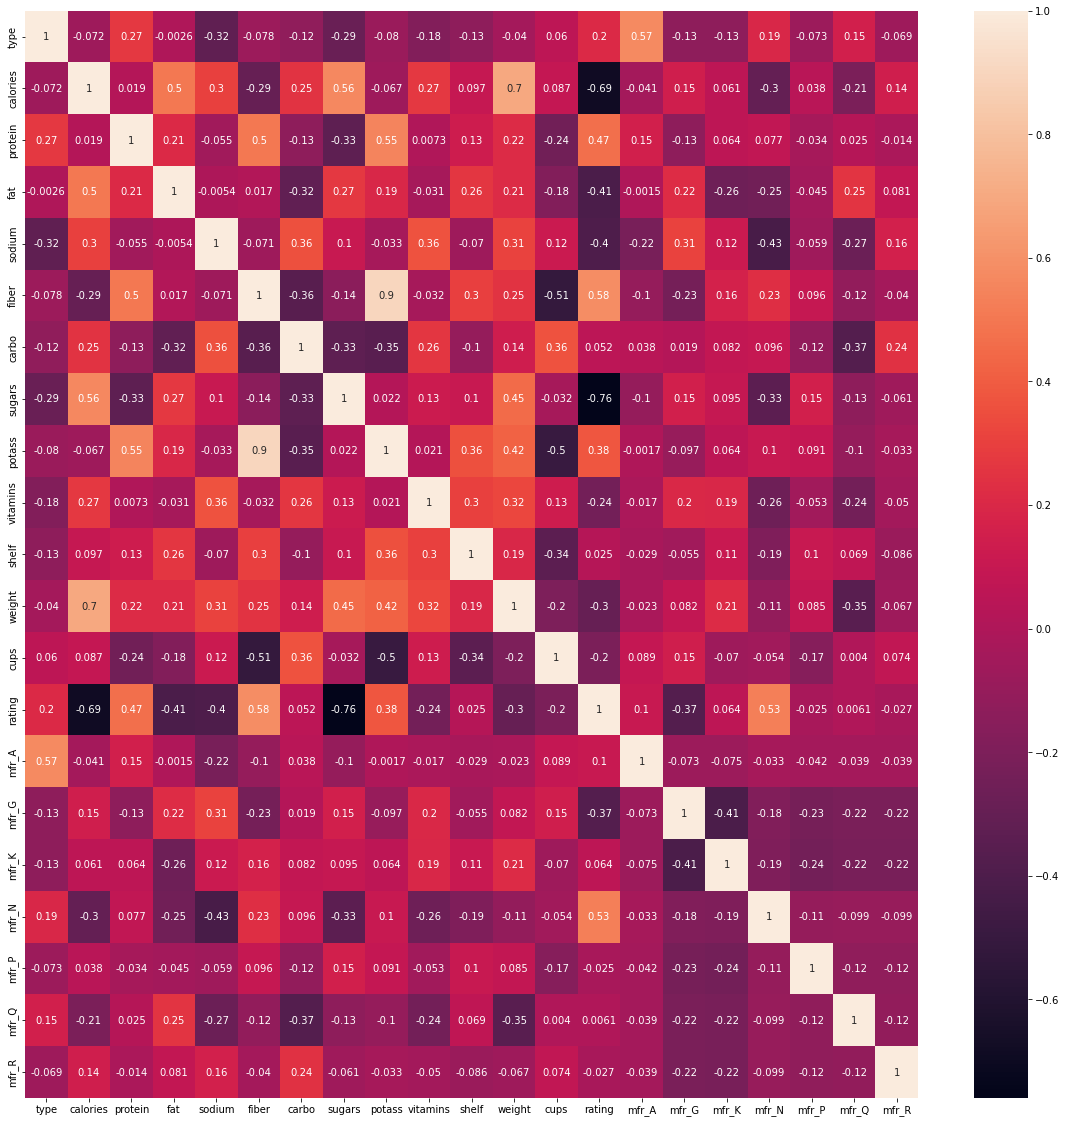

In [55]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation,annot=True)

In [56]:
Y = df['rating']

In [57]:
#As we can see, the attributes that contribute the most to our target variable are: calories and sugars followed by fiber
#For this reason, we are going to keep these two variables to elaborate our model.
X = df.drop(columns=['rating', 'type', 'fat', 'sodium', 'name', 'carbo', 'shelf', 'weight', 'cups', 'protein', 'potass', 'vitamins', 'mfr_A', 'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R'])


In [58]:
X.head()

,calories,fiber,sugars
0,70,10.0,6
1,120,2.0,8
2,70,9.0,5
3,50,14.0,0
4,110,1.0,8


## Data Scaling

C:\Users\dieee\anaconda3\envs\cursoPhyton\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='calories', ylabel='rating'>

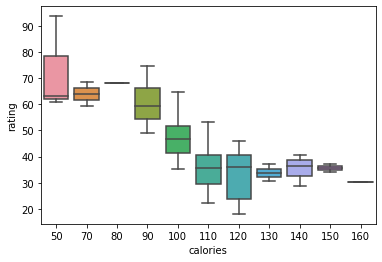

In [59]:
sns.boxplot('calories', 'rating', data = df)

C:\Users\dieee\anaconda3\envs\cursoPhyton\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sugars', ylabel='rating'>

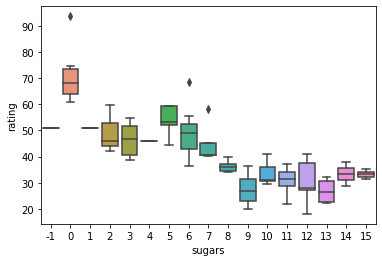

In [60]:
sns.boxplot('sugars', 'rating', data = df)

C:\Users\dieee\anaconda3\envs\cursoPhyton\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fiber', ylabel='rating'>

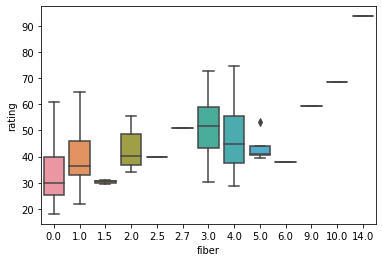

In [61]:
sns.boxplot('fiber', 'rating', data = df)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Creación del modelo


In [63]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.7)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicción

In [75]:
y_pred = model.predict(X_test)
y_pred

array([28.47474913, 43.78807019, 61.7194283 , 29.38245297, 34.22241088,
       30.20020884, 45.39171013, 30.20020884, 37.6872419 , 45.39171013,
       52.47506373, 37.6872419 , 46.78831186, 70.16751184, 48.91745103,
       23.43531626, 45.35983833, 26.81776255, 59.76545554, 42.82701971,
       31.42164417, 28.47474913, 26.81776255, 42.82701971])

## Resultados

In [66]:
model.score(X_test, y_test)

0.7335328459039012